# Domination et pression <a id="domination_pression"></a>

Ce notebook est dédié au calcul et l'affichage l'affichage de deux métriques : la domination et la pression.

---

## 1. Import des modules et connexion à la base de données

On commence par importer les modules nécessaires et se connecter à la base de données.

In [1]:
import sqlite3
import sys
import os

chemin_dossier_racine = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(chemin_dossier_racine)

from modules.data_interpretation import (
    plot_domination_evolution,
    plot_domination_score_evolution,
    plot_pression_evolution,
    plot_pression_score_evolution,
    evolution_score,
    affiche_evolution_score,
)

# Se connecter à la base de données
con = sqlite3.connect("BDD_avec_cluster.db")

---

## 2. Critère de domination

Présentation du modèle utilisé pour calculer le score de domination à chaque instant du match.

Soit $D_t$ le score de domination à l'instant $t$.

Le modèle peut être exprimé comme suit :

$D_t = \beta_0 + \beta_1 V_{t-1}  + \beta_2 E_t + \beta_3 D_{t-1} + \epsilon_{t}$

où :

-  $D_t$  : Score de domination à l'instant  $t$ 
-  $\beta_0$  : Intercept (constante)
-  $\beta_1$  : Coefficient des vainqueurs de points
-  $V_{t-1}$  : Vainqueur du point  $t-1$  ($1$ si le joueur a gagné le point, $0$ sinon)
-  $E_t$  : Écart entre le nombre de sets à l'instant  $t$ 



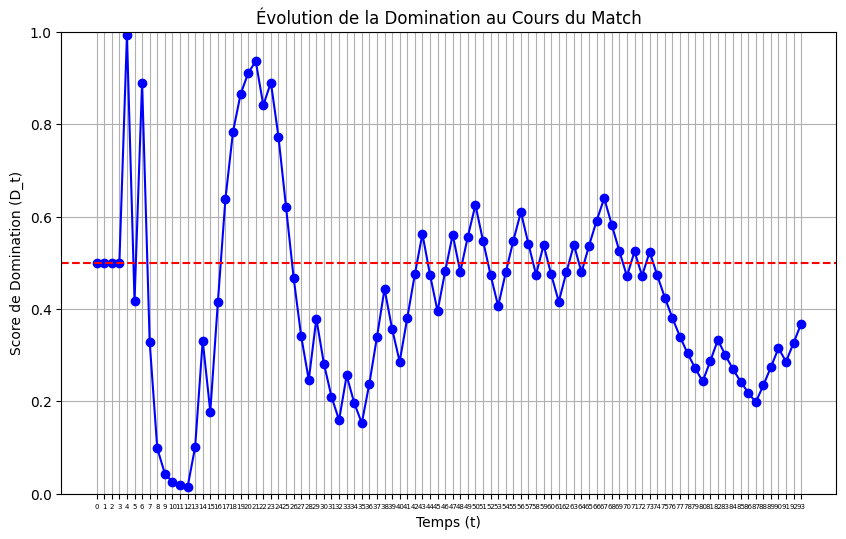

In [2]:
# Représente l'évolution de la domination pendant le match
plot_domination_evolution("ALEXIS-LEBRUN", "FAN-ZHENDONG_vs_ALEXIS-LEBRUN")

In [ ]:
# Récupère l'évolution du score en fonction des points et des sets
dico_joueur, dico_adv = evolution_score(
    "ALEXIS-LEBRUN", "FAN-ZHENDONG_vs_ALEXIS-LEBRUN"
)
# print(dico_joueur)
# print(dico_adv)

{'Set 1': [np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(3), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(5), np.int64(6), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)], 'Set 2': [np.int64(0), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(4), np.int64(4)], 'Set 3': [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(3), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(6), np.int64(6), np.int64(7), np.int64(8), np.int64(8), np.int64(9), np.int64(10), np.int64(10), np.int64(10), np.int64(10)], 'Set 4': [np.int64(0), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(3), np.int64(3), np.int64(3), np.int64(4), np.int64(5), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(8), np.int64(8), np.int64(8), np.int64(9), np.int64(9), np

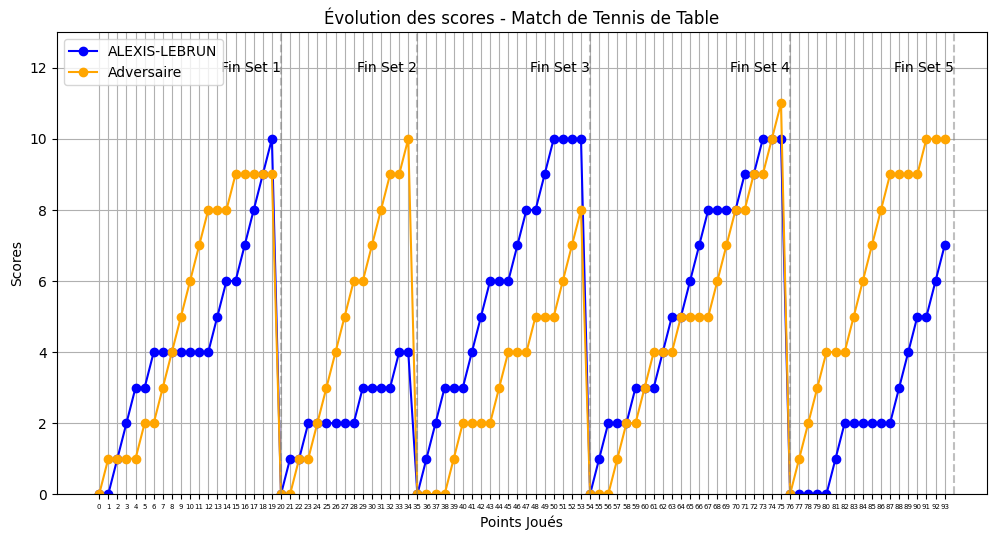

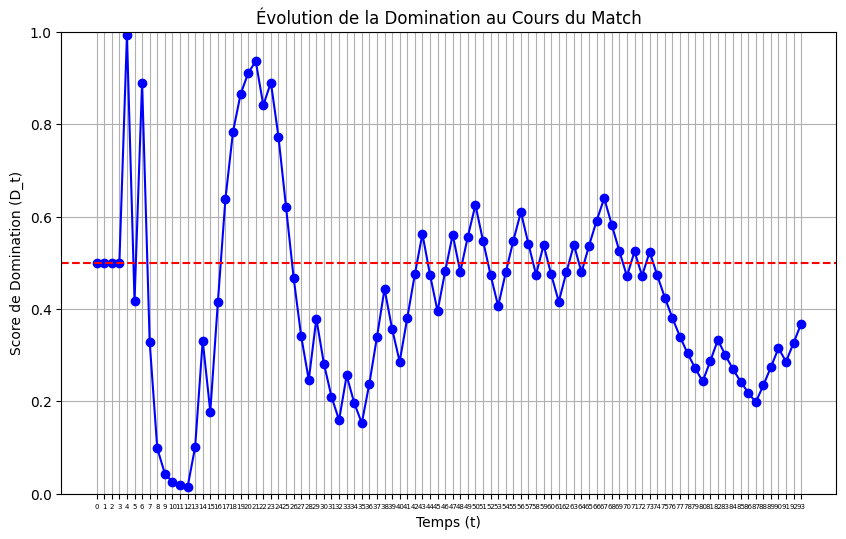

In [4]:
# Représente graphiquement l'évolution des points et de la domination
affiche_evolution_score("ALEXIS-LEBRUN", "FAN-ZHENDONG_vs_ALEXIS-LEBRUN")
plot_domination_evolution("ALEXIS-LEBRUN", "FAN-ZHENDONG_vs_ALEXIS-LEBRUN")

c:\Users\attou\OneDrive\Documents\Centrale Lyon\2A\PAr\table-tennis-returns\modules\data_interpretation.py:1682: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


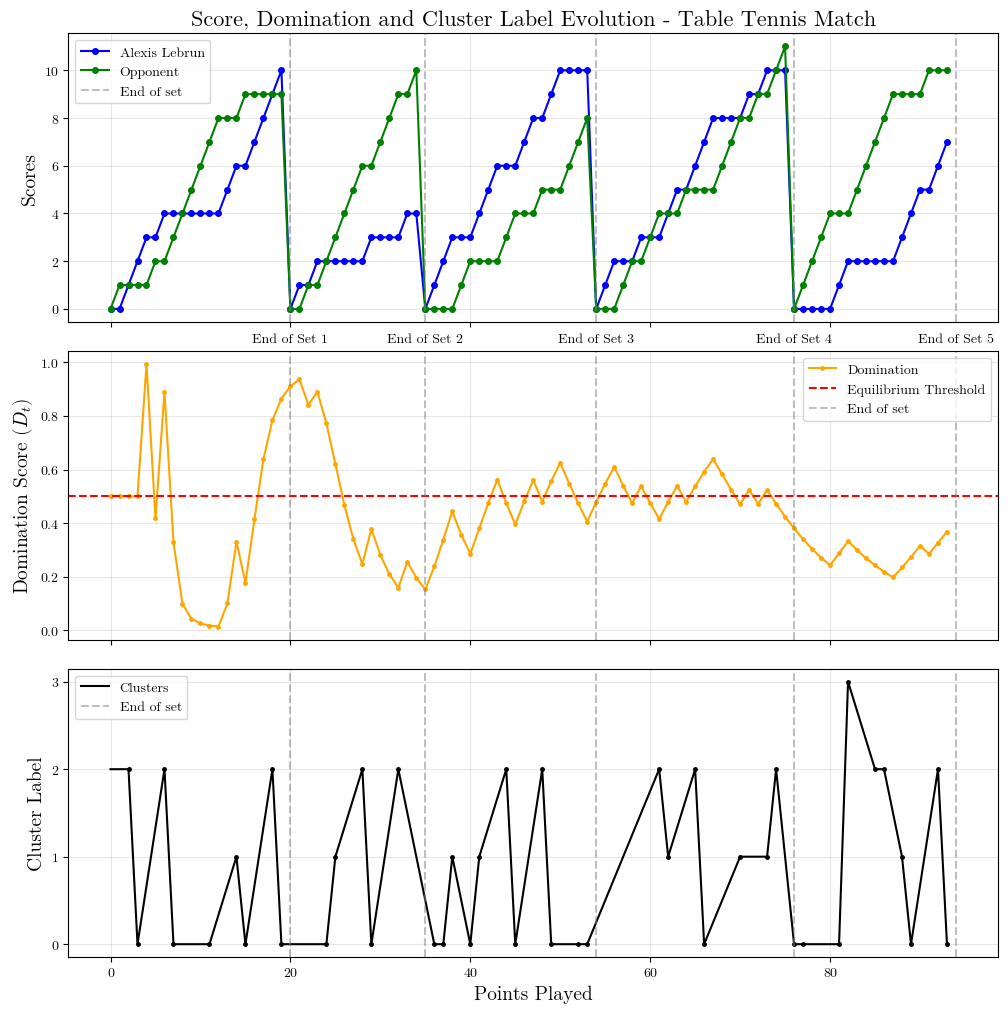

In [5]:
# Affiche l'évolution du score, de la domination et des clusters au cours du match
plot_domination_score_evolution(
    "ALEXIS-LEBRUN", "FAN-ZHENDONG_vs_ALEXIS-LEBRUN"
)

---

## 3. Mesure de la pression dans un match de tennis de table

On présente ici la formule utilisée pour calculer la pression ressentie par un joueur à chaque point du match, en combinant plusieurs indicateurs liés au score, aux moments clés, à la fin de set, etc.

La pression est calculée comme suit :

Pression = P1 * Pression_score + P2 * Pression_moments_clés + P3 * Pression_score_set + P4 * Pression_fin_set + P5 * Pression_set_décisif

avec :
- Pression_score = 1/(1+écart_score)
- Pression_moments_clés = 1 si balle de set ; 1.5 si balle de match
- Pression_fin_set = 1/(1+|10-min(10,max(score_joueur_A,score_joueur_B))|)
- Pression_score_set = 1/(1+écart_set)
- Pression_set_décisif = 1 si set décisif

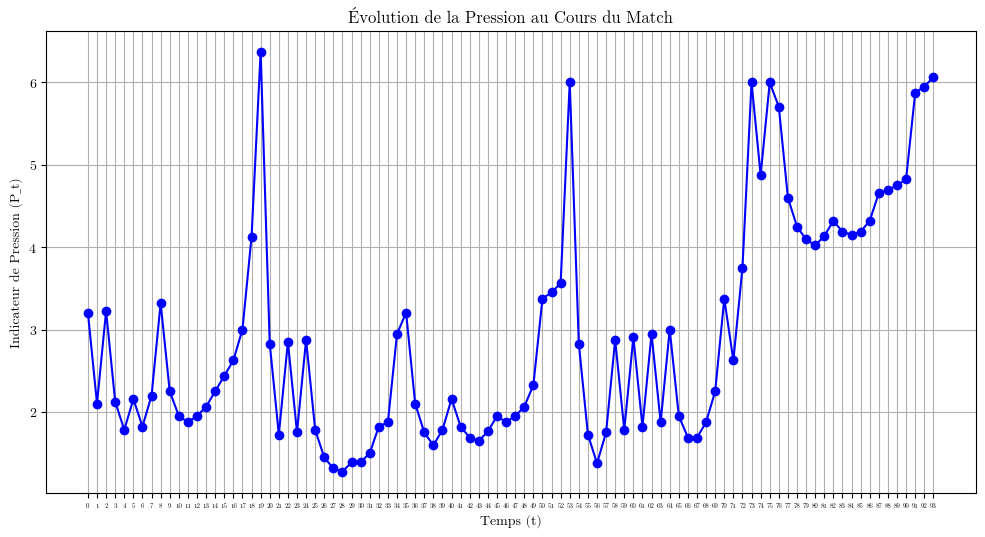

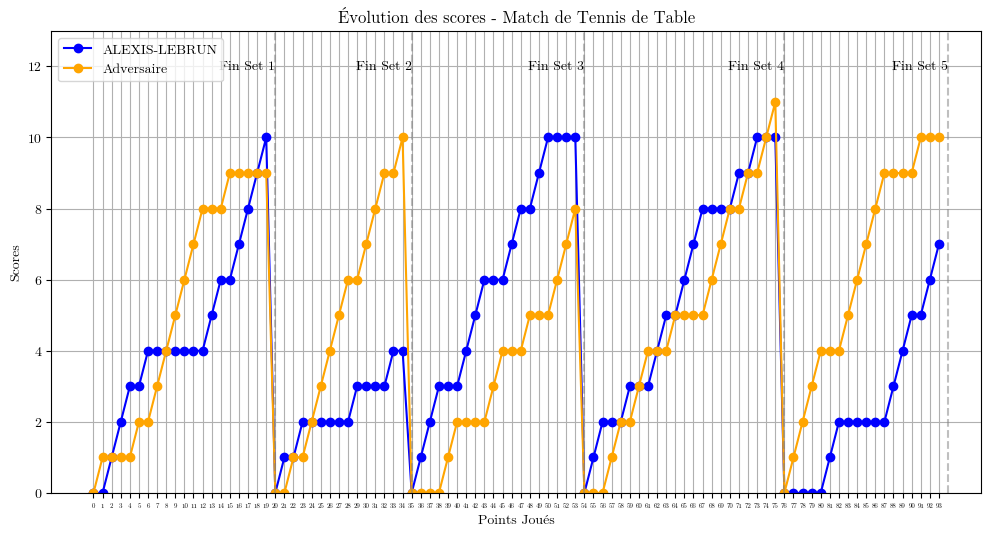

In [6]:
# Affichage de l'évolution de la pression pendant le match
plot_pression_evolution("ALEXIS-LEBRUN", "FAN-ZHENDONG_vs_ALEXIS-LEBRUN")

# Affichage de l'évolution du score pour comparaison
affiche_evolution_score("ALEXIS-LEBRUN", "FAN-ZHENDONG_vs_ALEXIS-LEBRUN")

c:\Users\attou\OneDrive\Documents\Centrale Lyon\2A\PAr\table-tennis-returns\modules\data_interpretation.py:1835: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


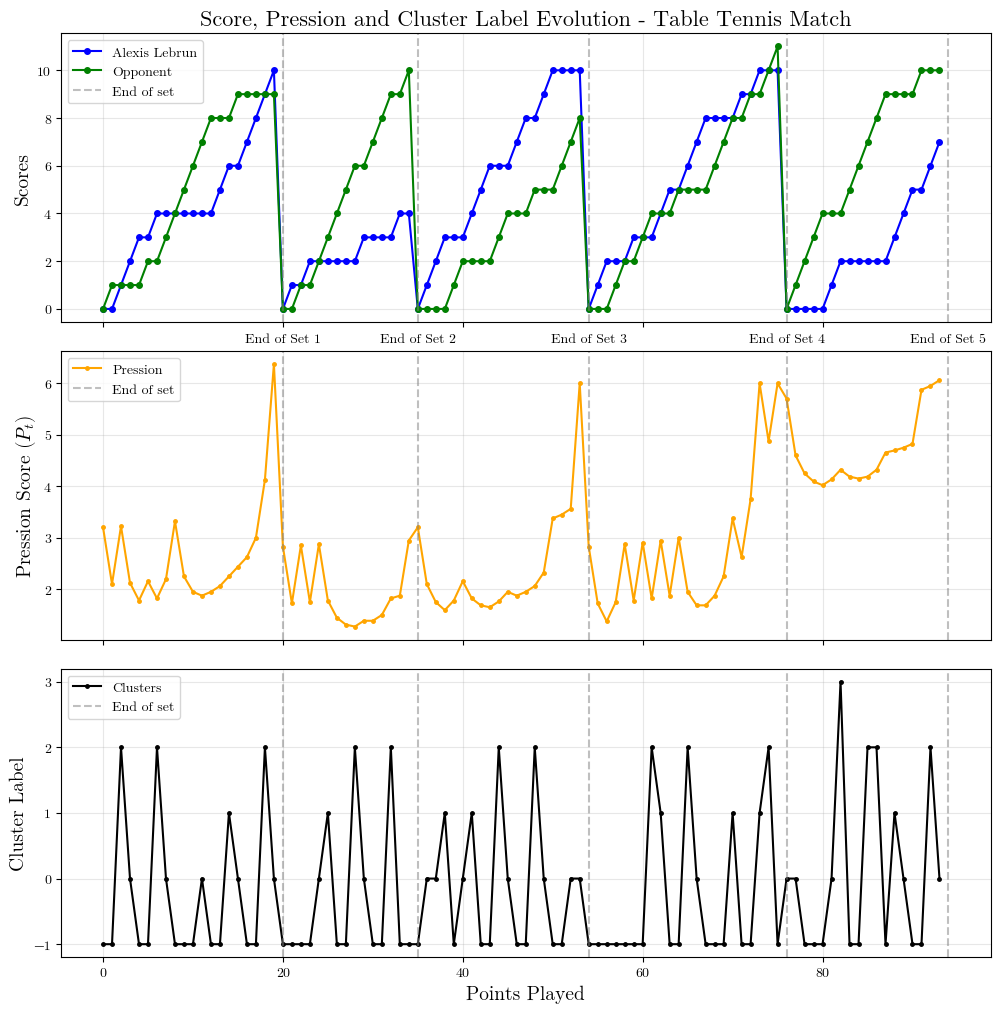

In [7]:
# Affiche l'évolution du score, de la pression et des clusters au cours du match
plot_pression_score_evolution("ALEXIS-LEBRUN", "FAN-ZHENDONG_vs_ALEXIS-LEBRUN")